In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [46]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 0, 'Age (years)')

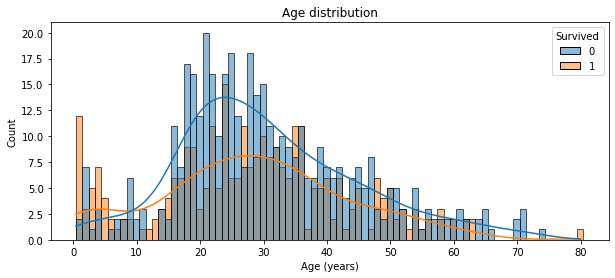

In [48]:
# Figure size
plt.figure(figsize=(10,4))
# Histogram
sns.histplot(data=train, x='Age', hue='Survived', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

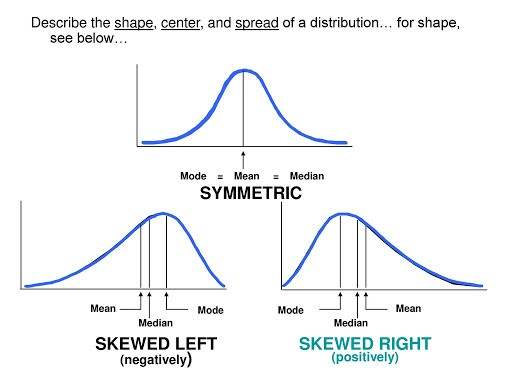

Age feature has right skewness, So if we are going to fill missing values we will use median.

In [49]:
train = pd.get_dummies(train,columns=['Pclass'])

In [50]:
train.isnull().sum()

PassengerId      0
Survived         0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

Age - Median of passengers in Pclass 1.

In [51]:
train[['Pclass_1', 'Age']].groupby(['Pclass_1'], as_index=False).median()

,Pclass_1,Age
0,0,26.0
1,1,37.0


Age - Median of passengers in Pclass 2.

In [52]:
train[['Pclass_2', 'Age']].groupby(['Pclass_2'], as_index=False).median()

,Pclass_2,Age
0,0,28.0
1,1,29.0


Age - Median of passengers in Pclass 3.

In [53]:
train[['Pclass_3', 'Age']].groupby(['Pclass_3'], as_index=False).median()

,Pclass_3,Age
0,0,33.0
1,1,24.0


In [54]:
#Age

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [55]:
train['Age']=train[['Age', 'Pclass_1',	'Pclass_2',	'Pclass_3']].apply(impute_age,axis=1)

In [56]:
train.isnull().sum()

PassengerId      0
Survived         0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64